In [ ]:
%pip install -R requirements.txt

# Base code:

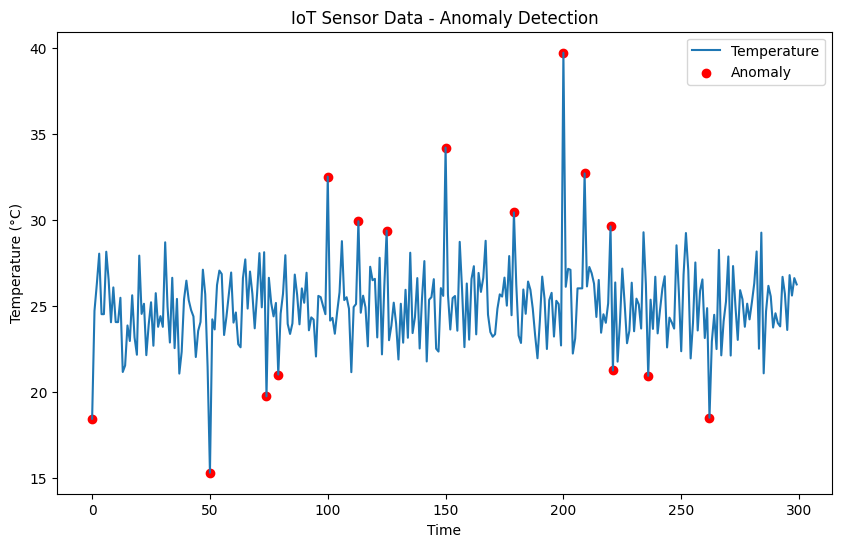

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300):
	np.random.seed(42)
	temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	temperature[::50] = np.random.uniform(10, 40, samples // 50)
	return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies(data):
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
	plt.figure(figsize=(10, 6))
	plt.plot(data.index, data['temperature'], label='Temperature')

	# Mark anomalies in red
	anomalies = data[data['anomaly'] == -1]
	plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

	plt.title('IoT Sensor Data - Anomaly Detection')
	plt.xlabel('Time')
	plt.ylabel('Temperature (°C)')
	plt.legend()
	plt.show()

sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(sensor_data)
plot_anomalies(analyzed_data) 

# Modified code:

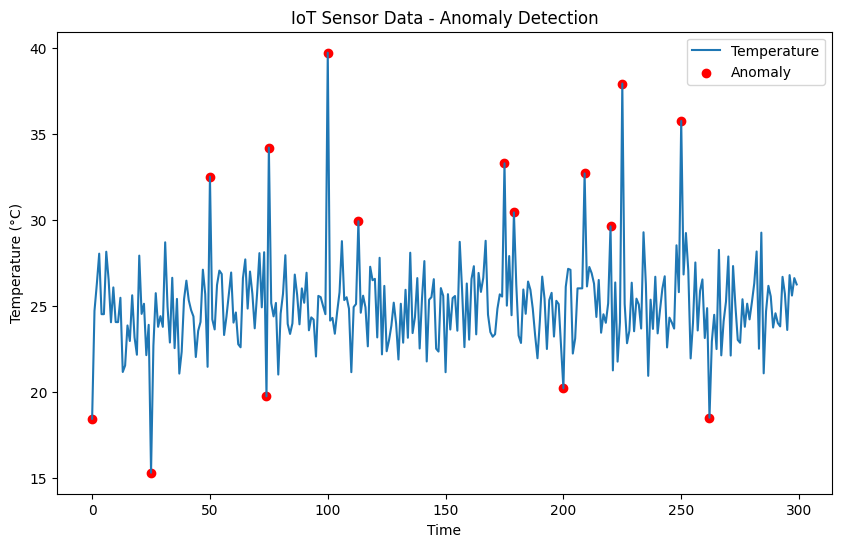

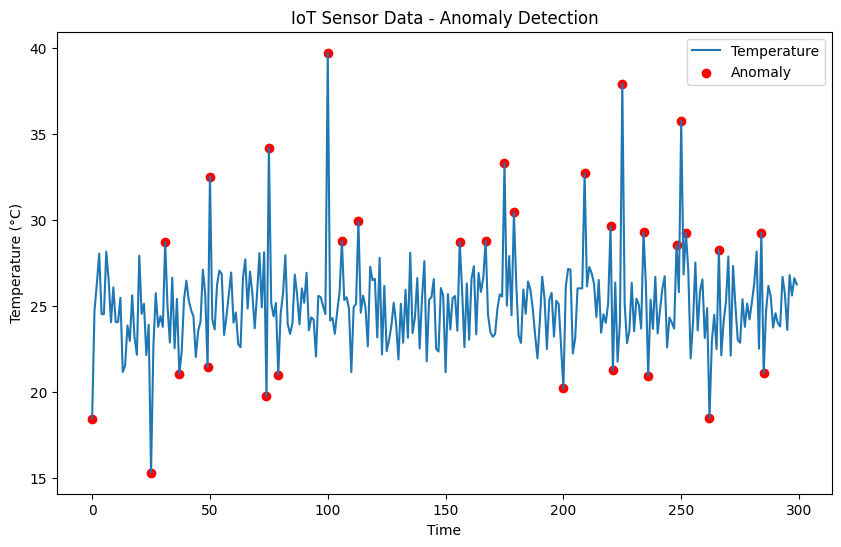

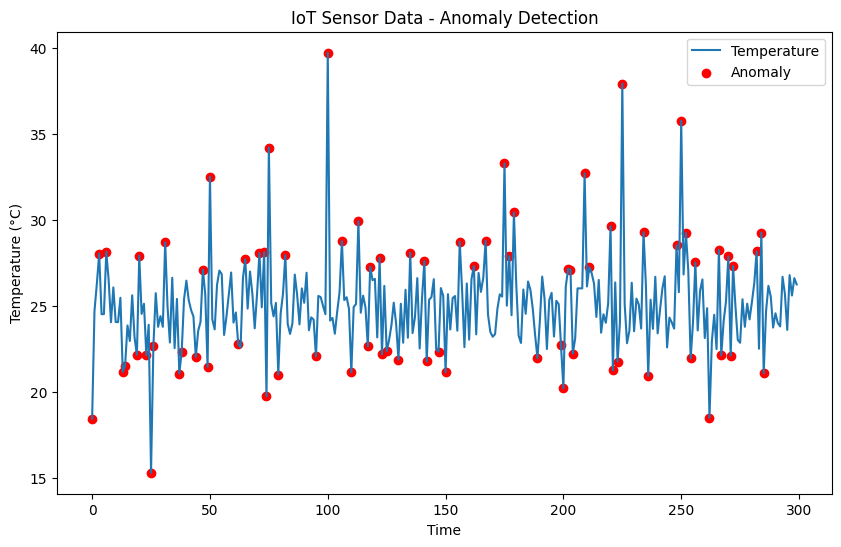

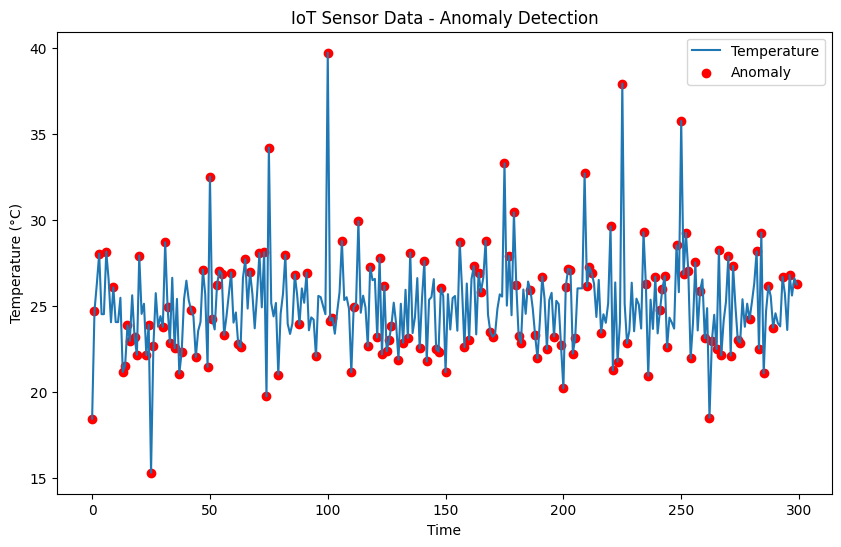

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Simulate IoT Sensor Data
def simulate_sensor_data(samples=300): #* (3) -> from 300 to 500
	np.random.seed(42)
	#* (1) -> from 25 to 20
	temperature = np.random.normal(25, 2, samples)  # Normal temperatures around 25°C
	# Introduce anomalies (very high or low temperatures)
	# temperature[::50] = np.random.uniform(10, 40, samples // 50) # -> OLD
	temperature[::25] = np.random.uniform(10, 40, samples // 25) #* (2) -> duplicated number of anomalies
	return pd.DataFrame({'temperature': temperature})

# Step 2: Detect Anomalies using Isolation Forest
def detect_anomalies_old(data): #* (4) -> Rename method
	model = IsolationForest(contamination=0.05, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

#* (4) -> Create separated method to use different contamination values
def detect_anomalies(data, contamination = 0.05):
	model = IsolationForest(contamination=contamination, random_state=42)
	data['anomaly'] = model.fit_predict(data[['temperature']])
	return data

# Step 3: Visualize Sensor Data and Anomalies
def plot_anomalies(data):
	plt.figure(figsize=(10, 6))
	plt.plot(data.index, data['temperature'], label='Temperature')

	# Mark anomalies in red
	anomalies = data[data['anomaly'] == -1]
	plt.scatter(anomalies.index, anomalies['temperature'], color='red', label='Anomaly')

	plt.title('IoT Sensor Data - Anomaly Detection')
	plt.xlabel('Time')
	plt.ylabel('Temperature (°C)')
	plt.legend()
	plt.show()

sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(data=sensor_data) # Change the method to use the new one
plot_anomalies(analyzed_data) 

# Plot different contamination values
sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.1)
plot_anomalies(analyzed_data) 

sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.25)
plot_anomalies(analyzed_data) 

sensor_data = simulate_sensor_data(300)
analyzed_data = detect_anomalies(data=sensor_data, contamination=0.5)
plot_anomalies(analyzed_data) 

# 1) Fijad la temperatura media en 20 grados.
# 2) Duplicad la amplitud de las temperaturas anómalas.
# 3) Cambiad la medida de la muestra a 500 valores.
# 4) Experimentad con los diferentes valores del parámetro "contamination". ¿Cuál es su efecto?